In [1]:
# current image _dataset = https://www.kaggle.com/datasets/mehaksingal/personal-financial-dataset-for-india

# Required_dependencies

In [2]:
!python3 -m pip install paddlepaddle-gpu
!pip install "paddleocr>=2.0.1"
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 250.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 94.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=ce6bb8f4631eed394f23e8b0a1a558afb30672b5fa035f3c7d8edf1ed1a26211
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


# Importing modules

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#ocr part
from paddleocr import PaddleOCR,draw_ocr
import os
import cv2
import matplotlib.pyplot as plt 
import matplotlib.image as img 
import time

#llm part 
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# OCR_testing

In [4]:
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:08<00:00, 473kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:17<00:00, 580kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 294kiB/s]

[2024/09/01 08:22:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [5]:
def clean_and_right_align(text, width=None):
    # Step 1: Remove extra spaces
    cleaned_text = ' '.join(text.split())

    # Step 2: Right-align the string (optional)
    if width:
        cleaned_text = cleaned_text.rjust(width)

    return cleaned_text

# query = clean_and_right_align(prompt, width=30)

In [6]:
def show_img(img_path):
    image=img.imread(img_path)
    plt.imshow(image)


# OCR EXAMPLE

[2024/09/01 08:22:26] ppocr DEBUG: dt_boxes num : 115, elapsed : 1.1010782718658447
[2024/09/01 08:22:27] ppocr DEBUG: cls num  : 115, elapsed : 0.24943065643310547
[2024/09/01 08:22:27] ppocr DEBUG: rec_res num  : 115, elapsed : 0.5726766586303711
2.0430984497070312
CITY OF
Account
Statement
GAINESVILLE
ACCOUNT INFORMATION
ACCOUNT:
035673-002
WATER RESOURCES
B
SERVICE ADDRESS
757 QUEEN CITY PARKWAY. SW
C
 BILLING DATE:
12/17/2021
 DUE DATE:
1/6/2022
METER READING
CUSTOMER NAME
757 QUEEN CITY PARKWAY, SW
Prevlous Reading
Reading
Current Reading
Date
Reading
CCFs
Gallons
GAINESVILLE, GA 30501
Serial No
()
Date
()
Used*
Used
83169339
10/10/21
292.000
12/15/21
324.202
32.202
24,087
1CCF = 748 galons
-
SPECIAL MESSAGE
CURRENT CHARGES
Previous unpaid balance, which includes transfers,
WATER
2,000 gallons @ Lifeline Tier
must be paid by 5 pm on 1-17-22 in order to avoid
5.44
3,000 gallons @ Tier 1
10.32
disconnection of service, a service fee, and
3,000 gallons @ Tier 2
12.90
possibly and ad

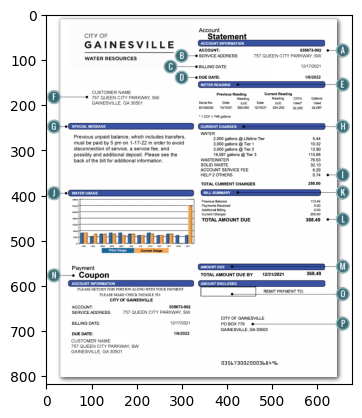

In [7]:
start=time.time()
extracted_text=""
show_img('/kaggle/input/personal-financial-dataset-for-india/Utility/33.jpg')
result = ocr.ocr('/kaggle/input/personal-financial-dataset-for-india/Utility/33.jpg')
end=time.time()
print(end-start)
inner_result = result[0]
for res in inner_result:
    extracted_text+=f' {res[1][0]}'
    print(res[1][0])

# llm setup

In [8]:
from kaggle_secrets import UserSecretsClient
secret_label = "GEMINI"
secret_value = UserSecretsClient().get_secret(secret_label)

In [9]:
def to_markdown(text):
  text = text.replace('•', ' *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


In [10]:
# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=secret_value)

In [11]:
model = genai.GenerativeModel('models/gemini-1.5-flash')

# csv format

In [12]:
def complete_pipeline_csv(img_path):
    show_img(img_path)
    extracted_text=""
    start_time = time.time()
    result = ocr.ocr(img_path)
    inner_result = result[0]

    inner_result
    for res in inner_result:
        extracted_text+=f' {res[1][0]}'
#         print(res[1][0])
    prompt='''generate a tabular or comma seperated format from the given financial text.'''
    prompt+=extracted_text
    query = clean_and_right_align(prompt, width=30)
    response = model.generate_content(query)
    return response

[2024/09/01 08:22:30] ppocr DEBUG: dt_boxes num : 125, elapsed : 0.10491585731506348
[2024/09/01 08:22:30] ppocr DEBUG: cls num  : 125, elapsed : 0.41222262382507324
[2024/09/01 08:22:31] ppocr DEBUG: rec_res num  : 125, elapsed : 0.38432884216308594
4.835975885391235


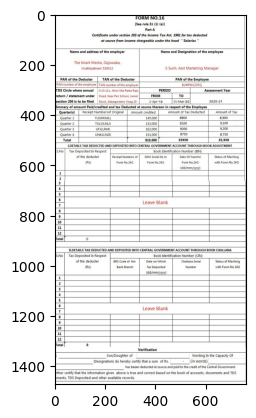

In [13]:
start=time.time()
response =complete_pipeline_csv("/kaggle/input/personal-financial-dataset-for-india/ITR_Form 16/15.jpg")
end=time.time()
print(end-start)


In [14]:
to_markdown(response.text)

> ## Form 16 Data:
> 
> **Employer Details:**
> 
> | Field | Value |
> |---|---|
> | Name & Address | The Inlark Media, Gajuwaka, Visakhpatnam 530012 |
> | PAN of Deducter | BURPN1235Q |
> | TAN of Deducter | 0-15-111 |
> | TDS Circle | Alluri Sita Rama Raju RoadNear Pen School Block,Dabagardens Vizag20 |
> 
> **Employee Details:**
> 
> | Field | Value |
> |---|---|
> | Name & Designation | S Sunil, Asst Marketing Manager |
> | PAN of Employee |  | 
> | TAN of Employer |  | 
> 
> **Salary & TDS Summary:**
> 
> | Quarter | Receipt Number | Amount Credited | Tax Deducted |
> |---|---|---|---|
> | Quarter 1 | TUOPKMLL | 145,000 | 8,900 |
> | Quarter 2 | TOLOLNLX | 152,000 | 9,100 |
> | Quarter 3 | UFJLLRHK | 162,000 | 9,200 |
> | Quarter 4 | UNKLLNZK | 151,000 | 8,750 |
> | **Total** |  | **610,000** | **35,950** |
> 
> **TDS Deposited through Book Adjustment:**
> 
> | S.No | Tax Deposited (Rs) | BIN | Receipt No. of Form 24G | Serial No. in Form 24G | Date of Transfer (dd/mm/yyyy) | Status of Matching |
> |---|---|---|---|---|---|---|
> |  |  |  |  |  |  |  |
> | Total | 0 |  |  |  |  |  |
> 
> **TDS Deposited through Challan:**
> 
> | S.No | Tax Deposited (Rs) | CIN | BRS Code | Date of Challan (K/ww/pp) | Serial No. | Bank Branch | Status of Matching |
> |---|---|---|---|---|---|---|---|
> |  |  |  |  |  |  |  |  |
> | Total | 0 |  |  |  |  |  |  | 
> 
> **Note:** The PAN and TAN of the employee are missing from the provided text.  


In [15]:
print(response.text)

## Form 16 Data:

**Employer Details:**

| Field | Value |
|---|---|
| Name & Address | The Inlark Media, Gajuwaka, Visakhpatnam 530012 |
| PAN of Deducter | BURPN1235Q |
| TAN of Deducter | 0-15-111 |
| TDS Circle | Alluri Sita Rama Raju RoadNear Pen School Block,Dabagardens Vizag20 |

**Employee Details:**

| Field | Value |
|---|---|
| Name & Designation | S Sunil, Asst Marketing Manager |
| PAN of Employee |  | 
| TAN of Employer |  | 

**Salary & TDS Summary:**

| Quarter | Receipt Number | Amount Credited | Tax Deducted |
|---|---|---|---|
| Quarter 1 | TUOPKMLL | 145,000 | 8,900 |
| Quarter 2 | TOLOLNLX | 152,000 | 9,100 |
| Quarter 3 | UFJLLRHK | 162,000 | 9,200 |
| Quarter 4 | UNKLLNZK | 151,000 | 8,750 |
| **Total** |  | **610,000** | **35,950** |

**TDS Deposited through Book Adjustment:**

| S.No | Tax Deposited (Rs) | BIN | Receipt No. of Form 24G | Serial No. in Form 24G | Date of Transfer (dd/mm/yyyy) | Status of Matching |
|---|---|---|---|---|---|---|
|  |  |  |  |  | 

# Json

In [16]:
def complete_pipeline_json(img_path):
#     show_img(img_path)
    extracted_text=""
    start = time.time()
    result = ocr.ocr(img_path)
    inner_result = result[0]

    inner_result
    if not inner_result:
        end=time.time()
        return 0,start-end
    for res in inner_result:
        extracted_text+=f' {res[1][0]}'
#         print(res[1][0])
    end=time.time()
    prompt='''Generate a json format for the given financial text. Don't give any descriptions just the json file which I will send to the backend of my app.  '''
    prompt+=extracted_text
    query = clean_and_right_align(prompt, width=30)
    response = model.generate_content(query)
    return response,start-end

In [17]:
response,inf_time =complete_pipeline_json('/kaggle/input/personal-financial-dataset-for-india/Utility/33.jpg')
# to_markdown(response.text)
print(response.text)

[2024/09/01 08:22:36] ppocr DEBUG: dt_boxes num : 115, elapsed : 0.08146548271179199
[2024/09/01 08:22:37] ppocr DEBUG: cls num  : 115, elapsed : 0.3154137134552002
[2024/09/01 08:22:37] ppocr DEBUG: rec_res num  : 115, elapsed : 0.3238849639892578
```json
{"account_number": "035673-002", "service_address": "757 QUEEN CITY PARKWAY, SW", "billing_date": "12/17/2021", "due_date": "1/6/2022", "customer_name": "757 QUEEN CITY PARKWAY, SW\nGAINESVILLE, GA 30501", "previous_reading": "292.000", "previous_reading_date": "10/10/21", "current_reading": "324.202", "current_reading_date": "12/15/21", "used": "32.202", "gallons": "24,087", "water_charges": {"lifeline_tier": "5.44", "tier_1": "10.32", "tier_2": "12.90", "tier_3": "110.68"}, "wastewater_charges": "76.53", "solid_waste_charges": "32.10", "account_service_fee": "6.29", "help_2_others": "0.74", "total_current_charges": "255.00", "previous_balance": "113.49", "payments_received": "0.00", "additional_billing": "0.00", "total_amount_due":